In [23]:
#import user modules
import helper_functions as hfun
import config as cf
import thouless_times as thouless
import importlib
importlib.reload(thouless)
importlib.reload(hfun)
importlib.reload(cf)
from os.path import exists

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.ticker import FormatStrFormatter
import os

#--- other modules
import numpy as np
import itertools
from scipy.signal import savgol_filter
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors

print(cf.base_directory)

../results/Heisenberg/disorder/PBC/


In [24]:
L = 14
w = 0.8
J=1.0
h=0.8
site = 1

def name_loc(L, w, site):
    return cf.base_directory + "ResponseFunction/j=%d/SigmaX_j=%d_L=%d,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(site, site, L, J, 0.0, 0.0, 0.0, h, w)

def name_ext(L, w):
    return cf.base_directory + "ResponseFunction/EXTENSIVE/SigmaX_L=%d,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(L, J, 0.0, 0.0, 0.0, h, w)

def name_sth(L, w):
    return cf.base_directory + "ResponseFunction/EXTENSIVE/smoothed/SigmaX_L=%d,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(L, J, 0.0, 0.0, 0.0, h, w)

def name_av(L, w):
    return cf.base_directory + "ResponseFunction/EXTENSIVE/SigmaXav_L=%d,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(L, J, 0.0, 0.0, 0.0, h, w)


def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [ ]:
#fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(13,6), dpi = 100)
#
#def plot(axis, func = name_ext):
#    for Lx in range(11, 15):
#        if exists(func(Lx, w)):
#            spec_fun = np.array(np.loadtxt(func(Lx, w), unpack=True))
#            x = spec_fun[0]
#            y = spec_fun[1] * 2**Lx/np.sqrt(Lx)
#            p = axis.plot(x, y, label="L=%d"%(Lx))
#
#    #b=50.0; ax1.plot(x, 6.e-1 * x**2 * (np.log10(x/b))**2,ls='--', color='black', label=r"$\omega^2\cdot\left(log_{10}\ \frac{\omega}{%.2f}\right)^2$"%b)
#    #ax1.plot(x, 1.5e1 * np.exp(-5*(x-0.2)**2),ls='--', color='red', label=r"$const$")
#
#    axis.grid()
#    axis.legend()
#    axis.set_yscale('log')
#    axis.set_xscale('log')
#    axis.set_xlabel(r"$\omega$", rotation=0, fontsize=16, labelpad=10)
#    axis.set_ylabel(r"$\left\langle\left|\langle n|\sigma^x|m\rangle\right|^2\right\rangle \cdot \frac{D}{\sqrt{L}}$", fontsize=16, labelpad=10)
#    axis.set_ylim(1e0, 1e1)
#    axis.set_xlim(5e-4, 1e1)
#    #axis.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#
#plot(axis=ax1, func=name_ext)
#plot(axis=ax2, func=name_sth)
#ax2.annotate('smoothed', xy=(100, 300), xycoords='axes points', color='black', size=20) 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


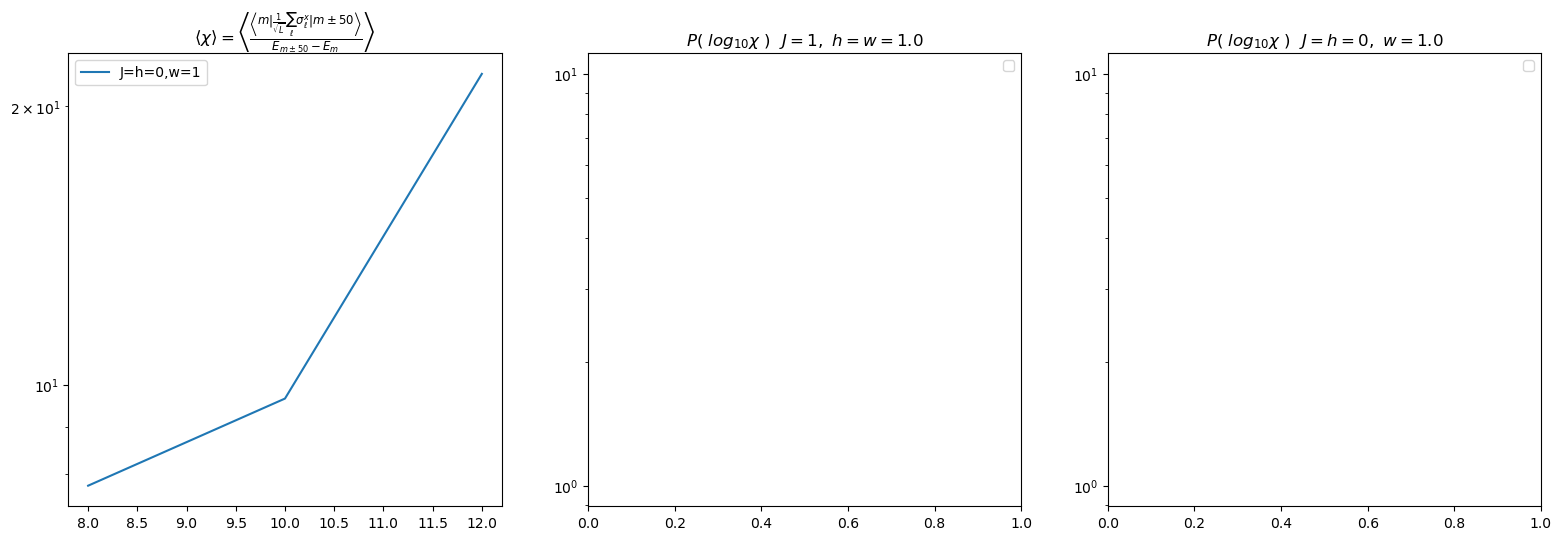

In [26]:
def name(J, h, w):
    return cf.base_directory + "Hybrydization/Scaling_SigmaZ_disorder_w,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(J, 0.0, 0.55, 0.0, h, w)

def name_dist(L, J, h, w):
    return cf.base_directory + "Dist_SigmaZ_disorder_w_log_L=%d,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(L, J, 0.0, 0.55, 0.0, h, w)


fig, (ax1, ax2, ax3) = plt.subplots( nrows=1, ncols=3, figsize=(19,6), dpi = 100)
sth = np.array(np.loadtxt(name(1,0.0,0.1), unpack=True))
ax1.plot(sth[0], sth[1], label="J=h=0,w=1")
#sth = np.array(np.loadtxt(name(1,0.8,0.1), unpack=True))
#ax1.plot(sth[0], sth[1], label="J=1.0,h=w=0.8")
ax1.set_title(r"$\left\langle \chi\right\rangle=\left\langle\frac{\left\langle m\left|\frac{1}{\sqrt{L}}\sum_\ell\sigma^x_\ell\right|m\pm50\right\rangle}{E_{m\pm50}-E_m}\right\rangle$")
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.legend()

#sth = np.array(np.loadtxt(name_dist(0,0.0,1.0), unpack=True))
#ax2.plot(sth[0], sth[1])
for L in range(14, 19,2):
    name = name_dist(L, 1,0.8,0.8)
    if exists(name):
        sth = np.array(np.loadtxt(name, unpack=True))
        ax2.plot(sth[0], sth[1], label="L=%d"%L)
ax2.legend()
ax2.set_title(r"$P\left(\ log_{10}\chi\ \right)\ \ J=1,\ h=w=1.0$")
ax2.set_yscale('log')

for L in range(10, 19,2):
    name = name_dist(L, 0,0.0,1.0)
    if exists(name):
        sth = np.array(np.loadtxt(name, unpack=True))
        ax3.plot(sth[0], sth[1], label="L=%d"%L)
ax3.legend()
ax3.set_title(r"$P\left(\ log_{10}\chi\ \right)\ \ J=h=0,\ w=1.0$")
ax3.set_yscale('log')
#ax3.set_xscale('log')

%2


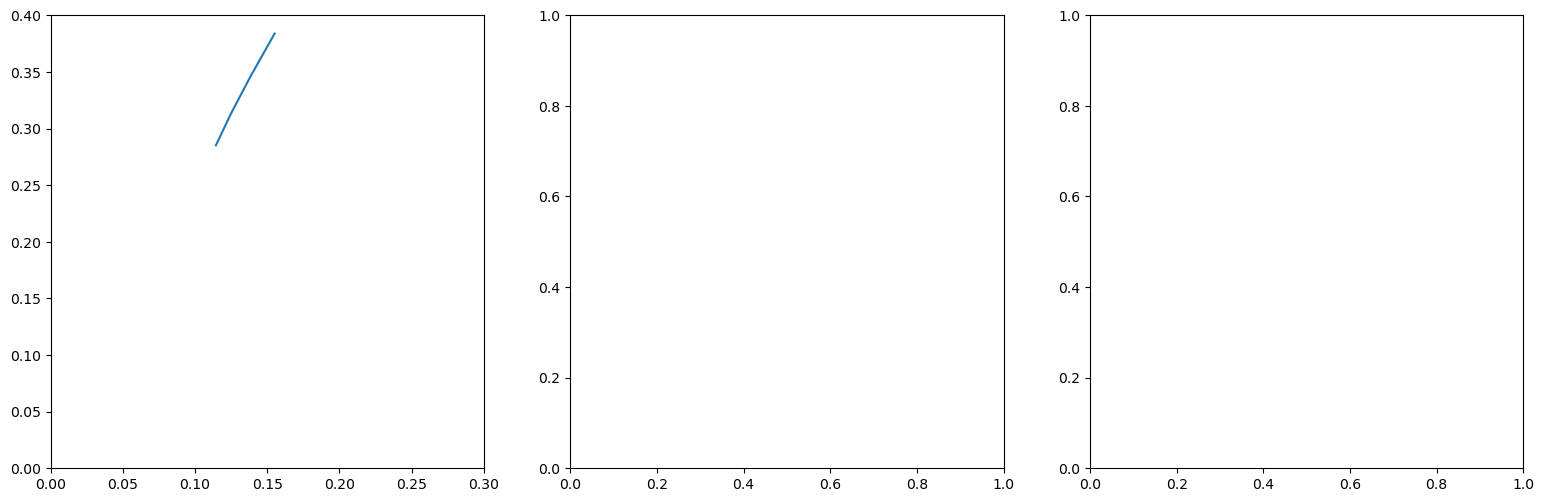

In [27]:
vals = [0.3839, 0.3455, 0.3135, 0.2852]
x = np.array([12., 14., 16., 18.])

fig, (ax1, ax2, ax3) = plt.subplots( nrows=1, ncols=3, figsize=(19,6), dpi = 100)
ax1.plot(1./x**0.75, vals)
ax1.set_xlim(0,0.3)
ax1.set_ylim(0,0.4)
print("%" + "%d"%2)